# 0. Project Introduction

This project aims to build a predictive model using a dataset related to diabetes cases. The model is designed to predict the outcome based on various features such as glucose levels, BMI, the number of pregnancies, and other relevant variables.

The approach taken in this project consists of several key steps:

1. **Data Cleaning, Visualization, and Preprocessing:** We will first explore the data, try to spot outliers and null values, and finally create datasets.
2. **Feature Selection and Correlations:** We will try to find different ways to use the data, reduce dimensions, and identify interesting correlations.
3. **Model Selection:** Then, we will create and initialize different models for our various datasets.
4. **Model Evaluation:** We will evaluate our model with different measurements and try to analyze and understand the outputs.
5. **Model Tuning:** We will tune our model using advanced methods to determine the best hyperparameters.
6. **Conclusion:**

The ultimate goal is to create a robust model capable of accurately predicting the outcome based on the input variables.


In [1]:
# First let's import our data and libraries needed
import pandas as pd
import numpy as np 
import torch
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import torch.nn as nn 
import torch.nn.functional as f
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from ydata_profiling import ProfileReport
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

df =  pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


**Let's explore the details of this dataset:**
- **Pregnancies**: Number of times the patient has been pregnant.
- **Glucose**: Plasma glucose concentration measured two hours after an oral glucose tolerance test.
- **BloodPressure**: Diastolic blood pressure (mm Hg).
- **SkinThickness**: Triceps skin fold thickness (mm).
- **Insulin**: 2-hour serum insulin level (μU/ml).
- **BMI**: Body mass index, calculated as weight in kg/(height in m)².
- **DiabetesPedigreeFunction**: A function that scores the likelihood of diabetes based on family history.
- **Age**: Age of the patient (years).
- **Outcome**: The target variable, indicating whether the patient has diabetes (1) or not (0).

Our model will focus on classifying the **Outcome** variable.


In [2]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# 1.CLEANING   VISUALIZE  PREPROCESSING DATA :

In [3]:

profile = ProfileReport(df, title="Diabetes Report")
profile.to_file("diabetes.html") 


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## 1.1 Exploring Null values and Outliers :

### 1.1.1 unrealistic  data

In [4]:
# Let's have a look on the null values 
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

It looks like the dataset doesn't contain any null values, but if we take a closer look, we can spot some absurd values, like `glucose = 0` or `blood pressure = 0`.

Here’s a breakdown of how many zeros we find in key columns:

- **Pregnancies** has 111 zeros (14.5%)
- **BloodPressure** has 35 zeros (4.6%)
- **SkinThickness** has 227 zeros (29.6%)
- **Insulin** has 374 zeros (48.7%)
- **BMI** has 11 zeros (1.4%)
- **Glucose** has 5 zeros (0.8%)

While it's possible for pregnancies to be 0 (since someone might never have been pregnant), for the other columns, having a value of 0 is logically impossible. :(

Let's now examine how much of our dataset contains these unrealistic values:


In [5]:
# getting unrealistic values
df_absurd = df[(df['BloodPressure'] == 0) | 
               (df['SkinThickness'] == 0) | 
               (df['Insulin'] == 0) | 
               (df['BMI'] == 0)  |
               (df['Glucose']==0) ]

df_absurd


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
764,2,122,70,27,0,36.8,0.340,27,0
766,1,126,60,0,0,30.1,0.349,47,1


Our dataset contains 376 unrealistic values out of 768 entries, which represents about 48.9% of the data.

In this case, excluding all rows with outlier values doesn't seem like the best option.

So, what are our alternatives?

    - **Option 1**: Replace the unrealistic data with the mean or median values.
    - **Option 2**: Remove all rows with unrealistic values.
    - **Option 3**: Leave the data unchanged and assume that our model will become more robust against future outliers.


let's have a look on each option :



#### **Option 1: Replacing Outliers or Absurd Data with the Mean or Median**

**Advantages**:
- **0 loss**: By replacing outliers, we maintain the overall size of the dataset without losing any lines, which is particularly important for small datasets like our (less than 800lines and less than 400 by erasing the absurd data).
- **Reduced Impact of Outliers**: Absurd data will have less influence on the model by being replaced with central values, like the mean or median.

**Disadvantages**:
- **Loss of Variability**: Replacing outliers reduces the natural variability of the data an compact it around the central value, which could hide important patterns or features or reduce performances.
- **Potential Bias**: If the dataset contains many outliers or is skewed, replacing values with the mean can introduce bias but in our case it would just replace old biais by new diferents ones.
- **Masking Underlying Problems**: Simply replacing the values may ignore underlying issues such as measurement errors or data collection problems(wich is very likely in our case).

---

#### **Option 2: Deleting All Absurd Values**

**Advantages**:
- **Removal of Noise**: Removing clearly incorrect or extreme values helps reduce the noise in the dataset, improving model accuracy but as we all know good accuracy doesn't mean good performance.
- **More Reliable Analysis**: The analysis will be made only on "safe" data and escape the bad influence of outliers, our analysis or model will then, not be distorted by extreme values.

**Disadvantages**:
- **Loss of Information**: Deleting data points, especially in small datasets like our, will lead to the loss of valuable information (here almost 50%) having small data set may led to a model which will not reflect the real world and be in fine totaly useless.

---

#### **Option 3: Not Changing Anything and Handling Outliers in the Model**

**Advantages**:
- **Preserves Data**: in opposition with the other two options keeping the data intact ensures that no information is lost.
- **Capture of Extreme Events**: Outliers could represent important real-world events or conditions, and keeping them allows for their analysis.


**Disadvantages**:
- **High Influence on Results**: Outliers can disproportionately impact the results of models, especially those sensitive to extreme values, such as linear regression it will certainly reduce our model performance, It will be harder to find paterns. For instance, if insulin levels are approximately 50 for outcome 1 and around 20 for outcome 2, having values of 0 for both outcomes would disrupt the pattern analysis, making it harder to discern meaningful trends
- **Model Performance Issues**: Certain algorithms will perform poorly if outliers are present, requiring more complex solutions to handle them effectively.

---

#### **Conclusion**

The choice of how to handle outliers depends on the specific context of your dataset and the analysis or model being used:
- **Option 1** (replacing with mean or median) is suitable for maintaining data size and reducing outlier impact.
- **Option 2** (deleting outliers) is useful if we suspect the outliers are errors or noise.
- **Option 3** (not changing anything) may be the best approach if we consider that absurd value are important ilke related to real-world phenomena or if you’re using models that are robust to extreme values but we will need to use certain kind of modeles which can handle this kond of data.
    

After some resaerchs on internet it look like any of this solution is the good one, or let's say that there is no good solution.

Instead of choosing one **we will try the 3 options**

#### **Datasets :**

We will try to create 3 datasets :
- `df` One with all the values even the 0
- `df_noZ` with no zeros values
- `df_completed` with missing value replaced by median or mean

We already got `df`.
For `df_noZ` &`df_completed` we need to calculate the outliers anyway but the 0 may make them wrong.
So we will have to temporaly erase them. 


### 1.1.2 Find Outliers :

Next, we'll try to identify outliers in the cleansed data ( data without unrealistic values).

To do this, we'll use the **IQR (Interquartile Range)** method.

But first, we need to remove the zeros from our dataset.


**Glucose :**


In [6]:
df_glu_noZ = df[df["Glucose"] != 0]


**Insuline :**

In [7]:
df_ins_noZ=df[df["Insulin"]!=0]


**BMI :**

In [8]:
df_BMI_noZ=df[df["BMI"]!=0]


**SkinThinkness :**

In [9]:
df_ST_noZ=df[df["SkinThickness"]!=0]


**BloodPressure :**

In [10]:
df_BP_noZ=df[df["BloodPressure"]!=0]


Now that we excluded zeros let's calculate the real means median and outliers values Using IQR method

for Glucose :

In [11]:
Q1_Glu = df_glu_noZ["Glucose"].quantile(0.25)
Q3_Glu = df_glu_noZ["Glucose"].quantile(0.75)

IQR_Glu = Q3_Glu - Q1_Glu

lower_bound_Glu = Q1_Glu - 1.5 * IQR_Glu
upper_bound_Glu = Q3_Glu + 1.5 * IQR_Glu

OutGlu = [lower_bound_Glu, upper_bound_Glu]


For Bloodpressure :

In [12]:
Q1_BP = df_BP_noZ["BloodPressure"].quantile(0.25)
Q3_BP = df_BP_noZ["BloodPressure"].quantile(0.75)

IQR_BP = Q3_BP - Q1_BP

lower_bound_BP = Q1_BP - 1.5 * IQR_BP
upper_bound_BP = Q3_BP + 1.5 * IQR_BP

OutBP = [lower_bound_BP, upper_bound_BP]


For SkinThickness :

In [13]:
Q1_ST = df_ST_noZ["SkinThickness"].quantile(0.25)
Q3_ST = df_ST_noZ["SkinThickness"].quantile(0.75)

IQR_ST = Q3_ST - Q1_ST

lower_bound_ST = Q1_ST - 1.5 * IQR_ST
upper_bound_ST = Q3_ST + 1.5 * IQR_ST

OutST = [lower_bound_ST, upper_bound_ST]



For BMI :

In [14]:
Q1_BMI = df_BMI_noZ["BMI"].quantile(0.25)
Q3_BMI = df_BMI_noZ["BMI"].quantile(0.75)

IQR_BMI = Q3_BMI - Q1_BMI

lower_bound_BMI = Q1_BMI - 1.5 * IQR_BMI
upper_bound_BMI = Q3_BMI + 1.5 * IQR_BMI

OutBMI = [lower_bound_BMI, upper_bound_BMI]

For Insuline :

In [15]:
Q1_Ins = df_ins_noZ["Insulin"].quantile(0.25)
Q3_Ins = df_ins_noZ["Insulin"].quantile(0.75)

IQR_Ins = Q3_Ins - Q1_Ins

lower_bound_Ins = Q1_Ins - 1.5 * IQR_Ins
upper_bound_Ins = Q3_Ins + 1.5 * IQR_Ins

OutIns = [lower_bound_Ins, upper_bound_Ins]

For pregnancies :

In [16]:
Q1_Pre = df["Pregnancies"].quantile(0.25)
Q3_Pre = df["Pregnancies"].quantile(0.75)

IQR_Pre = Q3_Pre - Q1_Pre

lower_bound_Pre = Q1_Pre - 1.5 * IQR_Pre
upper_bound_Pre = Q3_Pre + 1.5 * IQR_Pre

OutPre = [lower_bound_Pre, upper_bound_Pre]

For DiabetesPedigreeFunction :

In [17]:
Q1_DPF = df["DiabetesPedigreeFunction"].quantile(0.25)  
Q3_DPF = df["DiabetesPedigreeFunction"].quantile(0.75)  

IQR_DPF = Q3_DPF - Q1_DPF

lower_bound_DPF = Q1_DPF - 1.5 * IQR_DPF
upper_bound_DPF = Q3_DPF + 1.5 * IQR_DPF


OutDPF = [lower_bound_DPF, upper_bound_DPF]



For Age :

In [18]:
Q1_Age = df["Age"].quantile(0.25)
Q3_Age = df["Age"].quantile(0.75)

IQR_Age = Q3_Age - Q1_Age

lower_bound_Age = Q1_Age - 1.5 * IQR_Age
upper_bound_Age = Q3_Age + 1.5 * IQR_Age

OutAge = [lower_bound_Age, upper_bound_Age]

OutAge


[-1.5, 66.5]

### **Let's check if the data contain outliers** :

In [19]:
OutST, max(df_ST_noZ["SkinThickness"]), min(df_ST_noZ["SkinThickness"])

([1.0, 57.0], 99, 7)

Skin thickness have some outliers at maximum

In [20]:
OutBMI, max(df_BMI_noZ["BMI"]), min(df_BMI_noZ["BMI"])

([13.849999999999998, 50.25], 67.1, 18.2)

BMI have outliers at maximum

In [21]:
OutGlu , max(df_glu_noZ["Glucose"]), min(df_glu_noZ["Glucose"])

([36.0, 204.0], 199, 44)

Glucose don't have outliers any outliers

In [22]:
OutBP, max(df_BP_noZ["BloodPressure"]), min(df_BP_noZ["BloodPressure"])

([40.0, 104.0], 122, 24)

Blood pressure have outliers at minimum and maximum

In [23]:
OutIns, max(df_ins_noZ["Insulin"]), min(df_ins_noZ["Insulin"])

([-94.375, 360.625], 846, 14)

Insulin have outliers at maximum

In [24]:
OutPre, max(df["Pregnancies"]), min(df["Pregnancies"])

([-6.5, 13.5], 17, 0)

Pregnancies have some outliers at maximum

In [25]:
OutAge, max(df["Age"]), min(df["Age"])

([-1.5, 66.5], 81, 21)

Age have outlier at maximum

In [26]:
OutDPF, max(df["DiabetesPedigreeFunction"]), min(df["DiabetesPedigreeFunction"])

([-0.32999999999999996, 1.2], 2.42, 0.078)

DiabetesPedigreeFunction have outliers at maximum

### 1.1.3 Deciding what to do with Outliers :

Now that we've identified the outliers, let's retrieve the index of each row that contains these outliers. This will help us understand what portion of the dataset is affected by them.


In [27]:
#final list with outliers
outlier_indices = []

for index, row in df.iterrows():
    if row["Age"] < lower_bound_Age or row["Age"] > upper_bound_Age:
        outlier_indices.append(index)
    
    if row["Pregnancies"] < lower_bound_Pre or row["Pregnancies"] > upper_bound_Pre:
        outlier_indices.append(index)
    
    if row["DiabetesPedigreeFunction"] < lower_bound_DPF or row["DiabetesPedigreeFunction"] > upper_bound_DPF:
        outlier_indices.append(index)

for index, row in df_glu_noZ.iterrows():
    if row["Glucose"] < lower_bound_Glu or row["Glucose"] > upper_bound_Glu:
        outlier_indices.append(index)

for index, row in df_BP_noZ.iterrows():
    if row["BloodPressure"] < lower_bound_BP or row["BloodPressure"] > upper_bound_BP:
        outlier_indices.append(index)
    
for index, row in df_ST_noZ.iterrows():
    if row["SkinThickness"] < lower_bound_ST or row["SkinThickness"] > upper_bound_ST:
        outlier_indices.append(index)

for index, row in df_ins_noZ.iterrows():
    if row["Insulin"] < lower_bound_Ins or row["Insulin"] > upper_bound_Ins:
        outlier_indices.append(index)

for index, row in df_BMI_noZ.iterrows():
    if row["BMI"] < lower_bound_BMI or row["BMI"] > upper_bound_BMI:
        outlier_indices.append(index)



In [28]:
# we use set properties to keep unique values
outlier_indexs = list(set(outlier_indices))

#calculate percentage
proportion_outliers = len(outlier_indices) / len(df) * 100
proportion_outliers

11.848958333333332

The outliers (with zeros excluded) represent 11.8% of the entire selection. To enhance our model's performance and improve the calculations of the medians and means, we should consider removing these outliers.


Here is our initial dataset without any outliers:


In [29]:

df_no_Out = df.copy()
df_no_Out = df_no_Out.drop(index=outlier_indices)
df_no_Out

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## 1.2 Create The Dataset :

From this cleaned `df_no_Out` we will create the 3 datasets

### 1.2.1 `df_noZ` :

We just cuted the 0 values lines

In [30]:
df_noZ = df_no_Out[(df_no_Out["Glucose"] != 0) & 
            (df_no_Out["BloodPressure"] != 0) & 
            (df_no_Out["SkinThickness"] != 0) & 
            (df_no_Out["Insulin"] != 0) & 
            (df_no_Out["BMI"] != 0)]

df_noZ

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
6,3,78,50,32,88,31.0,0.248,26,1
14,5,166,72,19,175,25.8,0.587,51,1
16,0,118,84,47,230,45.8,0.551,31,1
19,1,115,70,30,96,34.6,0.529,32,1
...,...,...,...,...,...,...,...,...,...
751,1,121,78,39,74,39.0,0.261,28,0
755,1,128,88,39,110,36.5,1.057,37,1
760,2,88,58,26,16,28.4,0.766,22,0
763,10,101,76,48,180,32.9,0.171,63,0


### 1.2.2 `df_completed` :

We need means and median for each "0" variables

In [31]:
meanIns = df_ins_noZ["Insulin"].mean()
medianIns = df_ins_noZ["Insulin"].median()

meanBMI = df_BMI_noZ["BMI"].mean()
medianBMI = df_BMI_noZ["BMI"].median()

meanST = df_ST_noZ["SkinThickness"].mean()
medianST = df_ST_noZ["SkinThickness"].median()

meanBP = df_BP_noZ["BloodPressure"].mean()
medianBP = df_BP_noZ["BloodPressure"].median()

meanGlu = df_glu_noZ["Glucose"].mean()
medianGlu = df_glu_noZ["Glucose"].median()


**How will we replace 0 ?**

After conducting extensive research, it appears that we have two viable options for handling our data: 

using the mean or the median. In most scenarios, replacing outliers with the median is the preferred approach. However, given our specific context, the mean may provide a more accurate representation of the data since we have already addressed the outliers. Our dataset is relatively balanced, which further supports the decision to utilize the mean consistently. Therefore, we will choose to use the mean in all cases.

In [32]:
df_completed=df_no_Out.copy()

df_completed["Insulin"] = df_completed["Insulin"].replace(0, meanIns)
df_completed["BMI"] = df_completed["BMI"].replace(0, meanBMI)
df_completed["SkinThickness"] = df_completed["SkinThickness"].replace(0, meanST)
df_completed["BloodPressure"] = df_completed["BloodPressure"].replace(0, meanBP)
df_completed["Glucose"] = df_completed["Glucose"].replace(0, meanGlu)

df_completed

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
5,5,116.0,74.0,29.15342,155.548223,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


Now that we have our datasets ready it's time to play with it :)

# 2. FEATURE SELECTION AND CORRELATION  :

## 2.1.correlation with correlation matrix :

### 2.1.1. `df`:

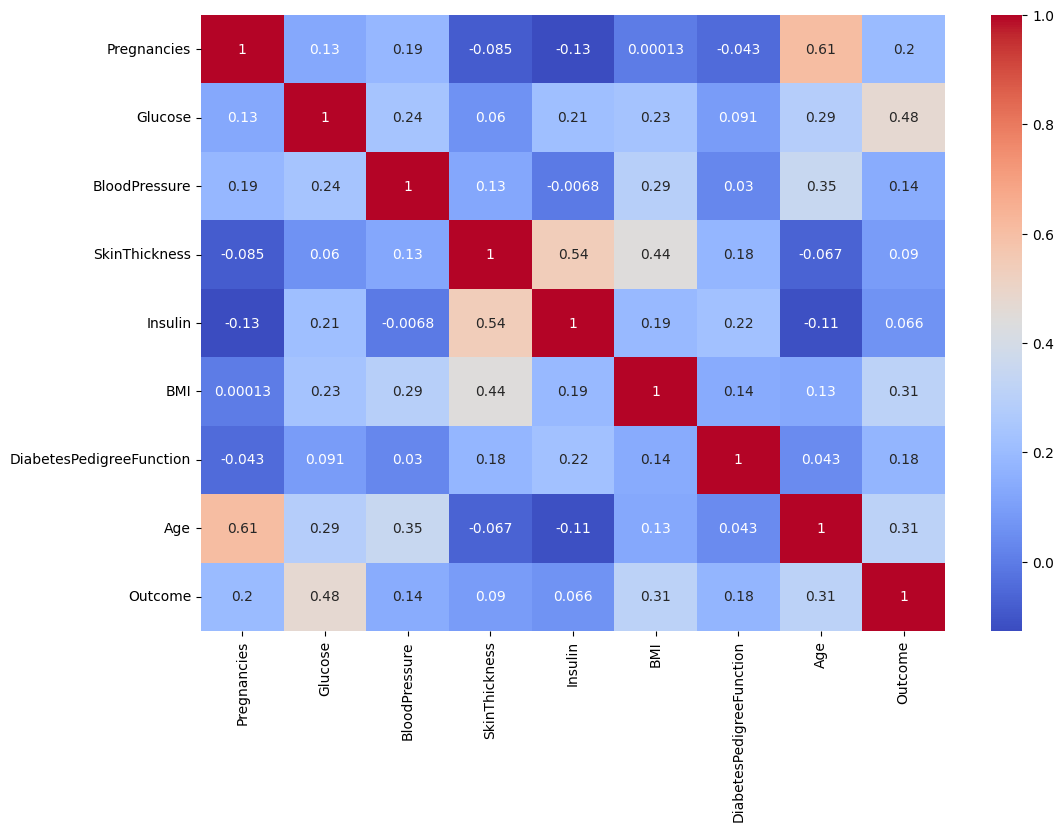

In [33]:
%matplotlib inline
corr_matrix = df.corr(method='spearman')
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

### 2.1.2. `noZ`:

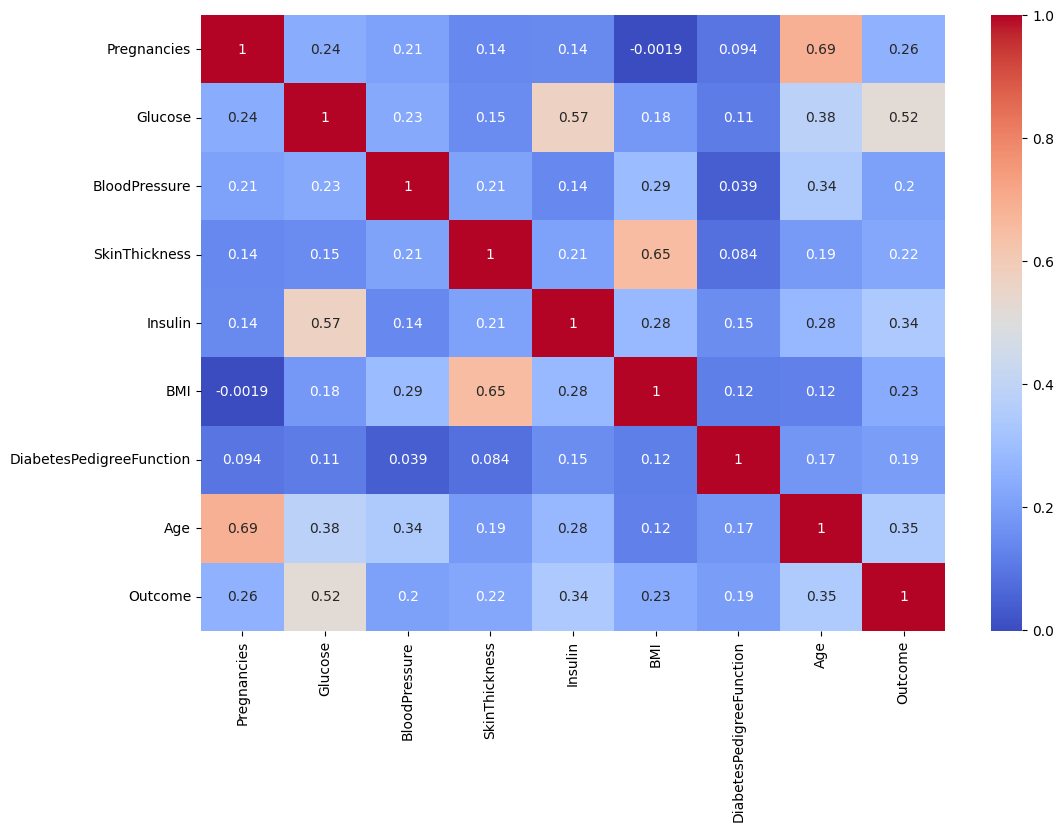

In [34]:
%matplotlib inline
corr_matrix = df_noZ.corr(method='pearson')
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

### 2.1.3. `df_com`:

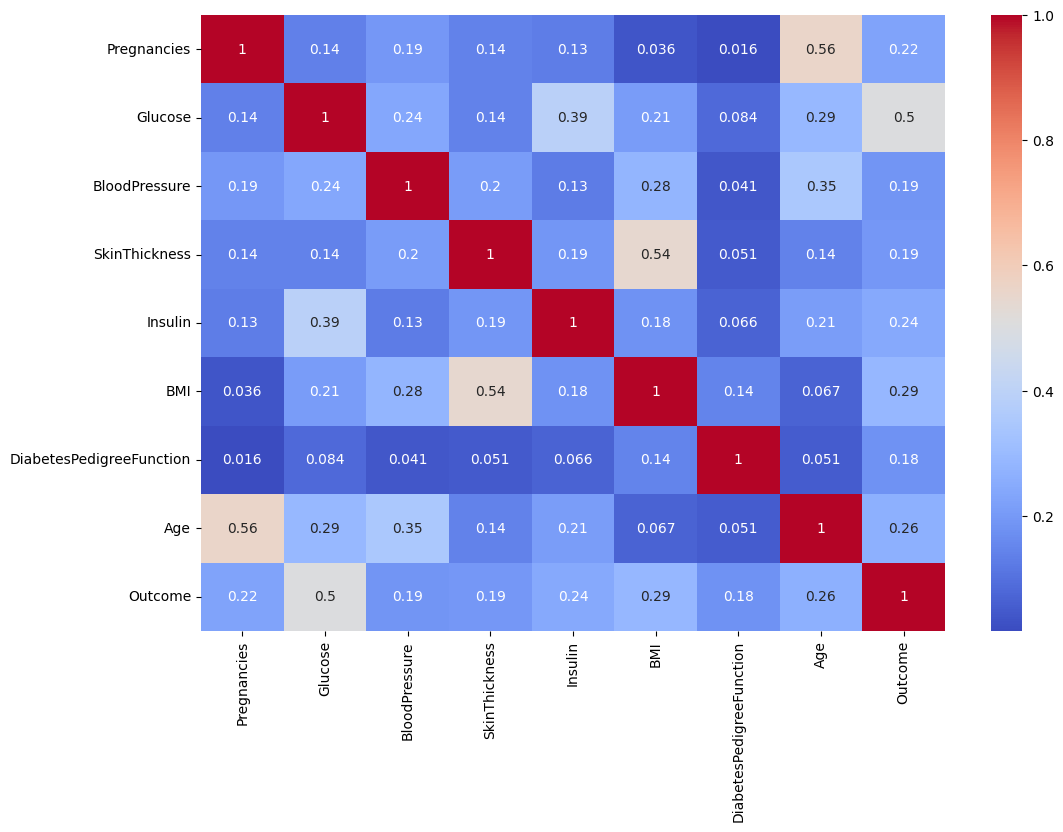

In [35]:
%matplotlib inline
corr_matrix = df_completed.corr(method='pearson')
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Very interesting...

Having three datasets provides us with a significant advantage, as it reveals details that might otherwise remain hidden.

For the correlation method, I chose **Pearson** for the `df_no_Z` and `df_completed` datasets because they are well-balanced and free of outliers.

For the `df` dataset, I opted for **Spearman** since the presence of zeros would pose a substantial challenge for calculating correlations. In this case, a ranking-based approach works better.

## 2.2 Analysis of Correlations:

#### **The 3 Matrices**

The most reliable matrix is the second one, based on the `df_noZ` dataset, because the data remains intact and is not subject to bias, particularly concerning insulin.

The least expressive matrix is `df_completed`, as much of the data, especially insulin, is centered around the mean, resulting in a correlation index very close to zero.

**- Outcome & Glucose:** Across all matrices, we observe a strong correlation between glucose and Outcome, which is logical given the intimate connection between glucose and diabetes. The correlation index is approximately 0.50.

**- Age & Pregnancies:** We see a very strong correlation between age and pregnancies, which makes sense— the longer people live, the more children they are likely to have.

**- BMI & SkinThickness:** These two variables also exhibit a strong correlation in every matrix.

**- BMI & Outcome:** There is no correlation between BMI and Outcome in any of the three matrices.

**- DiabetesPedigreeFunction:** This variable appears to be uncorrelated with any others.

---
#### **M1**

**- Insulin & SkinThickness:** This matrix is the only one where we observe a notable correlation, thanks to the different correlation method applied here. We can see a strong correlation between SkinThickness and Insulin.

---
#### **M2**

**- Glucose & Insulin:** In this matrix, Glucose and Insulin are correlated, a detail missing from the previous matrix due to the numerous zeros in insulin.

**- Insulin Values:** Additionally, we observe that Insulin values in this matrix are normal, resulting in sensible correlation indices, which are absent in the final matrix.

---

#### **M3**

**- Insulin:** In this matrix, insulin values are very close to zero because replacing zeros with the mean disrupts the correlation values.

#### **Conclusion:**

Matrix M3 provides the least information, as substituting missing values with the mean distorts the correlations, particularly for variables with many zeros. However, there are three strong and noteworthy correlations: between Outcome and Glucose, BMI and SkinThickness, and Age and Pregnancies. Unfortunately, there isn't a strong enough correlation to justify reducing the number of variables or dimensions. 

While we could consider eliminating the `DiabetesPedigreeFunction`, doing so might result in the loss of even more data, especially given how much is already missing.

Therefore, we will not reduce the dimensionality of the dataset. The only option would be to lessen the weight of the `DiabetesPedigreeFunction` variable before inputting it into the model.


## 2.3. PreProcess the data :

Preprocessing the data is a crucial step, but to do it effectively, we need to have an idea of which models we plan to use:

We will select 3 different models to compare and interpret the results.

- Given the nature of our data, the first idea that comes to mind is to use decision trees like Random Forest, which won't be sensitive to the abundance of zeros in the initial dataset.

- Next, I'd like to explore K-NN. The use of clustering offers a different and interesting approach to the problem.

- Lastly, an MLP (Multilayer Perceptron). Neural networks are also an intriguing approach to the problem, and with enough neurons, MLPs tend to be able to solve even the most complex tasks.


### 2.3.1 K-NN with `df_noZ` & `df_completed`:

For K-NN, we'll use **Min-Max Scaling**. The reason is simple: K-NN is all about **distances** between data points, and Min-Max Scaling ensures that every variable stays within the same range (typically between 0 and 1). This makes it much easier for the algorithm to accurately measure the distances between points without being "biased" by one variable dominating due to a larger scale.

K-NN typically uses **Euclidean distance** to find the nearest neighbors, so if one variable has a much larger range than others, it will dominate the distance calculation. For example, if Pregnancies ranges from 0 to 17, but Insulin ranges from 0 to 846, the larger scale of Insulin could overshadow the smaller values of Pregnancies and other variables. This would make the model prioritize Insulin more than it should.

What’s great about **Min-Max Scaling** is that it **preserves the relative proportions** of the data. So, even though the numbers are scaled down to the same range, the relationship between them remains intact. This ensures that no variable completely overpowers another, and the model can evaluate all the features on a level playing field.

By scaling everything between 0 and 1, we're helping the model "see" the data more clearly and give all variables a fair shot to influence the final decision.


#### 2.3.1.1 `df_noZ`:

In [36]:
min_max_scaler = MinMaxScaler()

features = df_noZ[['Pregnancies', 'Glucose', 'Insulin', 'BMI','BloodPressure','SkinThickness','DiabetesPedigreeFunction','Age']]

features_knn_noZ = min_max_scaler.fit_transform(features)

df_noZ_knn = pd.DataFrame(features_knn_noZ, columns=['Pregnancies', 'Glucose', 'Insulin', 'BMI','BloodPressure','SkinThickness','DiabetesPedigreeFunction','Age'])
df_noZ_knn

,Pregnancies,Glucose,Insulin,BMI,BloodPressure,SkinThickness,DiabetesPedigreeFunction,Age
0,0.076923,0.232394,0.228986,0.314286,0.379310,0.355556,0.074275,0.000000
1,0.230769,0.154930,0.211594,0.406349,0.103448,0.555556,0.147645,0.119048
2,0.384615,0.774648,0.463768,0.241270,0.482759,0.266667,0.454710,0.714286
3,0.000000,0.436620,0.623188,0.876190,0.689655,0.888889,0.422101,0.238095
4,0.076923,0.415493,0.234783,0.520635,0.448276,0.511111,0.402174,0.261905
...,...,...,...,...,...,...,...,...
333,0.076923,0.457746,0.171014,0.660317,0.586207,0.711111,0.159420,0.166667
334,0.076923,0.507042,0.275362,0.580952,0.758621,0.711111,0.880435,0.380952
335,0.153846,0.225352,0.002899,0.323810,0.241379,0.422222,0.616848,0.023810
336,0.769231,0.316901,0.478261,0.466667,0.551724,0.911111,0.077899,1.000000


#### 2.3.1.2 `df_completed`:

In [37]:
min_max_scaler = MinMaxScaler()

features = df_completed[['Pregnancies', 'Glucose', 'Insulin', 'BMI','BloodPressure','SkinThickness','DiabetesPedigreeFunction','Age']]


features_knn_com = min_max_scaler.fit_transform(features)

df_completed_knn = pd.DataFrame(features_knn_com, columns=['Pregnancies', 'Glucose', 'Insulin', 'BMI','BloodPressure','SkinThickness','DiabetesPedigreeFunction','Age'])
df_completed_knn

,Pregnancies,Glucose,Insulin,BMI,BloodPressure,SkinThickness,DiabetesPedigreeFunction,Age
0,0.461538,0.675325,0.407386,0.484277,0.466667,0.595745,0.493261,0.644444
1,0.076923,0.266234,0.407386,0.264151,0.366667,0.468085,0.245283,0.222222
2,0.615385,0.902597,0.407386,0.160377,0.333333,0.471349,0.533693,0.244444
3,0.076923,0.292208,0.228986,0.311321,0.366667,0.340426,0.079964,0.000000
4,0.384615,0.467532,0.407386,0.232704,0.500000,0.471349,0.110512,0.200000
...,...,...,...,...,...,...,...,...
679,0.769231,0.370130,0.478261,0.462264,0.533333,0.872340,0.083558,0.933333
680,0.153846,0.506494,0.407386,0.584906,0.433333,0.425532,0.235400,0.133333
681,0.384615,0.500000,0.281159,0.251572,0.466667,0.340426,0.150045,0.200000
682,0.076923,0.532468,0.407386,0.374214,0.266667,0.471349,0.243486,0.577778


### 2.3.2 MLP with `df_noZ` & `df_completed`& `df`:

For the MLP model, we'll use **Z-score standardization**. This technique centers the data around 0, with a standard deviation of 1.

The reason Z-score is important for MLP is that this model relies on **gradients** to update its weights. If the data isn't scaled, the gradients can become too large or too small, which can slow down the model's convergence or even prevent it from learning effectively. 

By centering the data around 0, we also avoid the **saturation zones** , where the gradient stuck around zero.



#### 2.3.2.1 MLP `df` :

In [ ]:
standard_scaler = StandardScaler()

features = df[['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'BloodPressure', 'SkinThickness', 'DiabetesPedigreeFunction', 'Age']]

features_mlp_df = standard_scaler.fit_transform(features)

df_mlp_df = pd.DataFrame(features_mlp_df, columns=['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'BloodPressure', 'SkinThickness', 'DiabetesPedigreeFunction', 'Age'])
df_mlp_df


,Pregnancies,Glucose,Insulin,BMI,BloodPressure,SkinThickness,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,-0.692891,0.204013,0.149641,0.907270,0.468492,1.425995
1,-0.844885,-1.123396,-0.692891,-0.684422,-0.160546,0.530902,-0.365061,-0.190672
2,1.233880,1.943724,-0.692891,-1.103255,-0.263941,-1.288212,0.604397,-0.105584
3,-0.844885,-0.998208,0.123302,-0.494043,-0.160546,0.154533,-0.920763,-1.041549
4,-1.141852,0.504055,0.765836,1.409746,-1.504687,0.907270,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.870031,0.115169,0.356432,1.722735,-0.908682,2.532136
764,-0.547919,0.034598,-0.692891,0.610154,0.046245,0.405445,-0.398282,-0.531023
765,0.342981,0.003301,0.279594,-0.735190,0.149641,0.154533,-0.685193,-0.275760
766,-0.844885,0.159787,-0.692891,-0.240205,-0.470732,-1.288212,-0.371101,1.170732


#### 2.3.2.2 MLP `df_noZ` :


In [39]:
standard_scaler = StandardScaler()

features = df_noZ[['Pregnancies', 'Glucose', 'Insulin', 'BMI','BloodPressure','SkinThickness','DiabetesPedigreeFunction','Age']]
features_mlp_noz = standard_scaler.fit_transform(features)

df_mlp_noZ = pd.DataFrame(features_mlp_noz, columns=['Pregnancies', 'Glucose', 'Insulin', 'BMI','BloodPressure','SkinThickness','DiabetesPedigreeFunction','Age'])
df_mlp_noZ


,Pregnancies,Glucose,Insulin,BMI,BloodPressure,SkinThickness,DiabetesPedigreeFunction,Age
0,-0.734222,-1.053106,-0.524790,-0.681177,-0.421732,-0.532393,-1.223164,-0.975968
1,-0.070674,-1.429411,-0.605631,-0.221557,-1.876278,0.352118,-0.901042,-0.453349
2,0.592874,1.581026,0.566566,-1.045703,0.123722,-0.925508,0.447097,2.159747
3,-1.065996,-0.061031,1.307609,2.124089,1.214632,1.826302,0.303932,0.069270
4,-0.734222,-0.163659,-0.497843,0.349005,-0.058096,0.155560,0.216442,0.173794
...,...,...,...,...,...,...,...,...
333,-0.734222,0.041598,-0.794260,1.046360,0.669177,1.040070,-0.849343,-0.244301
334,-0.734222,0.281064,-0.309213,0.650136,1.578269,1.040070,2.316199,0.696413
335,-0.402448,-1.087316,-1.575724,-0.633630,-1.149005,-0.237556,1.158946,-0.871444
336,2.251744,-0.642592,0.633933,0.079573,0.487359,1.924581,-1.207256,3.414033


#### 2.3.2.3 MLP `df_com` :


In [ ]:
standard_scaler = StandardScaler()

features = df_completed[['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'BloodPressure', 'SkinThickness', 'DiabetesPedigreeFunction', 'Age']]

features_mlp_com = standard_scaler.fit_transform(features)

df_mlp_com = pd.DataFrame(features_mlp_com, columns=['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'BloodPressure', 'SkinThickness', 'DiabetesPedigreeFunction', 'Age'])
df_mlp_com


,Pregnancies,Glucose,Insulin,BMI,BloodPressure,SkinThickness,DiabetesPedigreeFunction,Age
0,0.682421,0.985022,0.212028,0.252789,-0.003425,0.770540,0.799417,1.592439
1,-0.856063,-1.188318,0.212028,-0.846949,-0.557446,0.032683,-0.305095,-0.139968
2,1.297814,2.192433,0.212028,-1.365398,-0.742119,0.051550,0.979501,-0.048789
3,-0.856063,-1.050328,-0.936644,-0.611291,-0.557446,-0.705175,-1.041436,-1.051761
4,0.374724,-0.118897,0.212028,-1.004055,0.181249,0.051550,-0.905373,-0.231148
...,...,...,...,...,...,...,...,...
679,1.913208,-0.636359,0.668370,0.142815,0.365922,2.369232,-1.025429,2.777770
680,-0.548366,0.088088,0.212028,0.755526,-0.188098,-0.213270,-0.349115,-0.504686
681,0.374724,0.053590,-0.600711,-0.909792,-0.003425,-0.705175,-0.729291,-0.231148
682,-0.856063,0.226078,0.212028,-0.297080,-1.111466,0.051550,-0.313098,1.318901


### 2.3.3 Decision Tree : With `df`, `df_noZ`, `df_completed`

After doing some research on DataScience StackExchange and Stack Overflow, it seems that normalization and **standardization are not essential for decision trees**, as they are not particularly sensitive to the scale or magnitude of the values.

So nothing more to say for this part 


# 3 MODEL SELECTION :

Now the fun begins, we finally got through the data, and we need to play with it using different models:

As Pedro Domingos said: *"Every machine learning algorithm excels at some problems and fails at others. There is no model that succeeds everywhere"*, so we have to choose our model carefully:

- First, we will use the MLP on each dataset, even if we can expect bad results on `df`.

- Then we will use K-NN with a radical approach. Honestly, I don't know what to expect from this one. I think it will especially work on `df_completed` because the distance will be broken in mostly one dimension, but in this direction, the broken points will be close to each other. Same as MLP for `df`, it will certainly be a rampage so we will avoid this one.

- And we save the best for last. As David J.C. MacKay said: *"The model must be chosen based on the inherent structure of the data."* In our case, the initial data structure fits perfectly with a decision tree algorithm. For this, we will use a Random Tree.
 tree algorithm in our case we will use Random Tree

## 3.1. MLP :


### 3.1.1. Preparing our data for training the model :

For the spliting we usualy chose `20%/80%` or `30%/70%` of the dataset but in our case will go for the perfect middle `25%/75%`

#### 3.1.1.1. `df`:

In [41]:
X1 = df_mlp_df.values
y1 = df["Outcome"].values

y1=torch.tensor(y1, dtype=torch.float32)
X1=torch.tensor(X1, dtype=torch.float32)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25, random_state=0)
X1.shape, y1.shape

(torch.Size([768, 8]), torch.Size([768]))

#### 3.1.1.2. `df_noZ`:

In [42]:
X2 = df_mlp_noZ.values
y2 = df_noZ["Outcome"].values

y2=torch.tensor(y2, dtype=torch.float32)
X2=torch.tensor(X2, dtype=torch.float32)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25, random_state=0)
X2.shape, y2.shape

(torch.Size([338, 8]), torch.Size([338]))

#### 3.1.1.3.`df_completed` :

In [43]:
X3 = df_mlp_com.values
y3 = df_completed["Outcome"].values

y3=torch.tensor(y3, dtype=torch.float32)
X3=torch.tensor(X3, dtype=torch.float32)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.25, random_state=0)
X3.shape, y3.shape


(torch.Size([684, 8]), torch.Size([684]))

### 3.1.2. Building a Model :

I was first thinking of using a premade MLP from sklearn but we are here to do the thing well , so I chose to use pytorch because it give more maniability and precision

In [44]:
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

class MLP(nn.Module):
    def __init__(self,  hidden_size,):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(8, hidden_size)  
        self.fc2 = nn.Linear(hidden_size, hidden_size)  
        self.fc3 = nn.Linear(hidden_size, 1)  

    def forward(self, x):
        x = F.relu(self.fc1(x))  
        x = F.relu(self.fc2(x))  
        x = self.fc3(x)          
        return x

Let's explain:

Here, we use a premade class called `nn.Module` (with `nn` standing for neural network).

The `__init__` method allows us to set up the internal layers and neuron structure. In this section, we configure the input layer to have 8 neurons since our data consists of 8 different features. We define the output layer to have 1 neuron because the model will return a value between 0 and 1.

Values below 0.5 are considered to be 0, while values above 0.5 are classified as 1.

The `forward` method is essential in every MLP (Multi-Layer Perceptron) model; it enables the model to iterate through epochs and learn from itself with the help of optimizers. Inside this method, we use the ReLU (Rectified Linear Unit) activation function, which essentially looks like this:

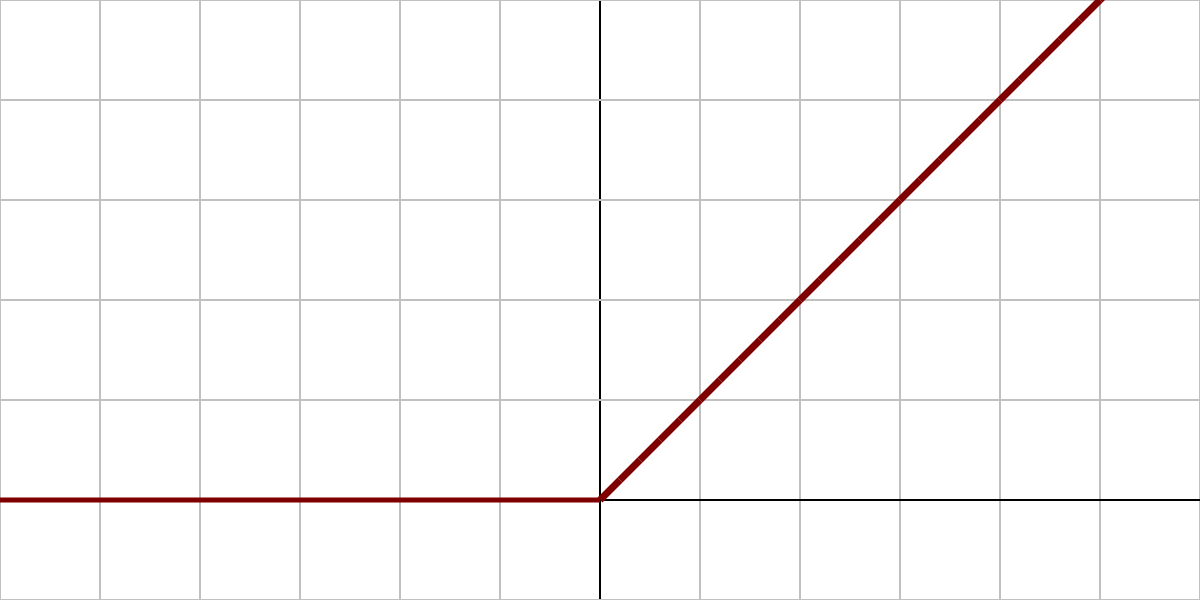

### Why ReLU?
We use ReLU because it allows our model to fit nonlinear variables and make nonlinear predictions.


### 3.1.3 : Train the model 

**`/!\ FOR THIS PART PLAYED MY CODE ON A 1000 EPOCH PARAMETERS /!\`**

but because it goes to verfitting I used 100 epoch


First hyper parrameters :

In [45]:
hidden_size = 64  
learning_rate = 0.001
batch_size = 100
num_epochs = 100


Well, well, well

Hidden_size is the number of neurons in the hidden_layers, here we have 2 hidden layers with 64 neurons each, the most we add layers and neurons the more our model will be able to fit and learn from complex data set but the more it will take time for it to converge.

Learning rate is basicly the intial step the model will make for gradient (the learning rate will be adapted by optimizer during the training)

batch size, we use batch size to avoid a model training on the whole data at each epoch ( we avoid overfitting)

And epochs (we all know but i will precise) it's the number of step it will take to learn for our model


Those variables are hypêrparrameters (parameters set up by the developer) we will try to tune it in one of our next part

#### 3.1.3.1 : Training on `df`

In [46]:
model_df = MLP(hidden_size)
criterion = nn.BCEWithLogitsLoss()  # For binary classification
optimizer = optim.Adam(model_df.parameters(), lr=learning_rate)

Here, we chose **BCE With Logits** as our loss function. 

**BCE** (Binary Cross-Entropy) is the best loss function for binary classification. However, since we want our output to be a value between 0 and 1, we use this variation of BCE to obtain stochastic outputs, allowing us to transform the raw logits into a 0-1 scale.

For the optimizer, we selected **Adam**. Adam is the most widely used and default optimizer, so we are using it in this case. We may consider changing it during the tuning phase.


In [47]:
dataset1 = TensorDataset(X1, y1)
dataloader1 = DataLoader(dataset1, batch_size=batch_size, shuffle=True)

We will use batch to separate the data and train it on different part, this help to avoid problems like overfitting


**Training and optimization loop:**

To create these we're going to write a pYthon for loop in the theme of unofficial optimization loop song (there is a video version too)

The unoffcial pytorch optimization song :

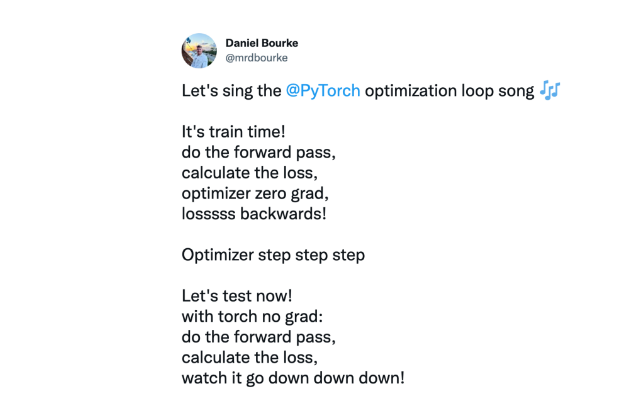

The unofficial PyTorch optimization loops song, a fun way to remember the steps in a PyTorch training (and testing) loop.

I found it on https://www.learnpytorch.io/01_pytorch_workflow/ when i was trying to learn pytorch

In [48]:
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(dataloader1):
        # Forward pass
        outputs = model_df(inputs.float())  # Ensure inputs are of type float
        labels = labels.float().unsqueeze(1)  # Adjust shape of labels to (batch_size, 1)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.8f}')

Epoch [1/100], Loss: 0.65031022
Epoch [2/100], Loss: 0.62328655
Epoch [3/100], Loss: 0.53168589
Epoch [4/100], Loss: 0.53341973
Epoch [5/100], Loss: 0.53773153
Epoch [6/100], Loss: 0.48533466
Epoch [7/100], Loss: 0.45548019
Epoch [8/100], Loss: 0.39615580
Epoch [9/100], Loss: 0.32008299
Epoch [10/100], Loss: 0.46998659
Epoch [11/100], Loss: 0.47117436
Epoch [12/100], Loss: 0.40553522
Epoch [13/100], Loss: 0.44894183
Epoch [14/100], Loss: 0.49673322
Epoch [15/100], Loss: 0.42957553
Epoch [16/100], Loss: 0.52857351
Epoch [17/100], Loss: 0.45000568
Epoch [18/100], Loss: 0.38889953
Epoch [19/100], Loss: 0.35725868
Epoch [20/100], Loss: 0.50265354
Epoch [21/100], Loss: 0.39346227
Epoch [22/100], Loss: 0.41610286
Epoch [23/100], Loss: 0.44764212
Epoch [24/100], Loss: 0.41259697
Epoch [25/100], Loss: 0.44578955
Epoch [26/100], Loss: 0.39636064
Epoch [27/100], Loss: 0.50774610
Epoch [28/100], Loss: 0.47114822
Epoch [29/100], Loss: 0.49596271
Epoch [30/100], Loss: 0.30992335
Epoch [31/100], Los

We don't expect much from `df` because it contains biased data, and the presence of zeros may adversely influence the results.

As we can see, the results are quite unstable towards the end, suggesting that 1000 epochs may be too many.

Here are the last 10 results:

- Epoch [990/1000], Loss: 0.00063186
- Epoch [991/1000], Loss: 0.00046396
- Epoch [992/1000], Loss: 0.00051455
- Epoch [993/1000], Loss: 0.00031238
- Epoch [994/1000], Loss: 0.00057134
- Epoch [995/1000], Loss: 0.00026692
- Epoch [996/1000], Loss: 0.00029358
- Epoch [997/1000], Loss: 0.00070473
- Epoch [998/1000], Loss: 0.00035612
- Epoch [999/1000], Loss: 0.00036159
- Epoch [1000/1000], Loss: 0.00045019

The best result we obtained was: **Epoch [917/1000], Loss: 0.00011946**.

- Below **0.0000001**, the result is 0%.
- Below **0.0000010**, the result is 0%.
- Below **0.0000100**, the result is 0%.

Here are some additional epoch results for context:

- Epoch [459/1000], Loss: 0.0002027
- Epoch [460/1000], Loss: 0.0001126
- Epoch [461/1000], Loss: 0.0001471
- Epoch [462/1000], Loss: 0.0001019
- Epoch [463/1000], Loss: 0.0001666
- Epoch [464/1000], Loss: 0.0000664
- Epoch [465/1000], Loss: 0.0000716
- Epoch [466/1000], Loss: 0.000166924
- Epoch [467/1000], Loss: 0.1104505
- Epoch [468/1000], Loss: 0.1189181

We can observe something interesting: the data show a significant "jump," which is referred to as a **Loss Spike**. This could indicate a sign of overfitting.

Overall, this data appears to be problematic for this MLP model.


#### 3.1.3.2. Training of `df_noZ` :

In [49]:
model_noZ = MLP(hidden_size)
criterion = nn.BCEWithLogitsLoss()  # For binary classification
optimizer = optim.Adam(model_noZ.parameters(), lr=learning_rate)

In [50]:
dataset2 = TensorDataset(X2, y2)
dataloader2 = DataLoader(dataset2, batch_size=batch_size, shuffle=True)

for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(dataloader1):
        # Forward pass
        outputs = model_noZ(inputs.float())  # Ensure inputs are of type float
        labels = labels.float().unsqueeze(1)  # Adjust shape of labels to (batch_size, 1)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.8f}')

Epoch [1/100], Loss: 0.66818011
Epoch [2/100], Loss: 0.61787862
Epoch [3/100], Loss: 0.57653689
Epoch [4/100], Loss: 0.53023481
Epoch [5/100], Loss: 0.51941860
Epoch [6/100], Loss: 0.56931823
Epoch [7/100], Loss: 0.51208007
Epoch [8/100], Loss: 0.39810643
Epoch [9/100], Loss: 0.50777876
Epoch [10/100], Loss: 0.42822677
Epoch [11/100], Loss: 0.36749008
Epoch [12/100], Loss: 0.36575845
Epoch [13/100], Loss: 0.52472895
Epoch [14/100], Loss: 0.37144446
Epoch [15/100], Loss: 0.47016713
Epoch [16/100], Loss: 0.36230588
Epoch [17/100], Loss: 0.36843821
Epoch [18/100], Loss: 0.50958699
Epoch [19/100], Loss: 0.32799175
Epoch [20/100], Loss: 0.42310971
Epoch [21/100], Loss: 0.38713232
Epoch [22/100], Loss: 0.44335124
Epoch [23/100], Loss: 0.43634605
Epoch [24/100], Loss: 0.50010794
Epoch [25/100], Loss: 0.47496212
Epoch [26/100], Loss: 0.43868166
Epoch [27/100], Loss: 0.33579826
Epoch [28/100], Loss: 0.35194185
Epoch [29/100], Loss: 0.40397853
Epoch [30/100], Loss: 0.41377273
Epoch [31/100], Los

We are expecting a lot more from `df_noZ` because it's the most pure and brut data got :
As we see result are very unstable at the end

Those are the last 10 results :




- Epoch [990/1000], Loss: 0.00063186
- Epoch [991/1000], Loss: 0.00046396
- Epoch [992/1000], Loss: 0.00051455
- Epoch [993/1000], Loss: 0.00031238
- Epoch [994/1000], Loss: 0.00057134
- Epoch [995/1000], Loss: 0.00026692
- Epoch [996/1000], Loss: 0.00029358
- Epoch [997/1000], Loss: 0.00070473
- Epoch [998/1000], Loss: 0.00035612
- Epoch [999/1000], Loss: 0.00036159
- Epoch [1000/1000], Loss: 0.00045019
- 




The best result we got is : Epoch [575/1000], Loss: 0.00000048

under 0.0000001 there is 0,1%

under 0.0000010 there is 11.9%

under 0.0000100 there is 60.9%


we get a lot better result than mean convergence and performance is better on this dataset for an MLP model

#### 3.1.3.3. Training of `df_com` :

In [51]:
model_com = MLP(hidden_size)
criterion = nn.BCEWithLogitsLoss()  # For binary classification
optimizer = optim.Adam(model_com.parameters(), lr=learning_rate)

In [52]:
dataset3 = TensorDataset(X3, y3)
dataloader3 = DataLoader(dataset3, batch_size=batch_size, shuffle=True)

for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(dataloader3):
        # Forward pass
        outputs = model_com(inputs.float())  # Ensure inputs are of type float
        labels = labels.float().unsqueeze(1)  # Adjust shape of labels to (batch_size, 1)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.8f}')

Epoch [1/100], Loss: 0.66378719
Epoch [2/100], Loss: 0.62404138
Epoch [3/100], Loss: 0.62981486
Epoch [4/100], Loss: 0.56252444
Epoch [5/100], Loss: 0.51387280
Epoch [6/100], Loss: 0.45423675
Epoch [7/100], Loss: 0.44187659
Epoch [8/100], Loss: 0.41321623
Epoch [9/100], Loss: 0.43689209
Epoch [10/100], Loss: 0.49525297
Epoch [11/100], Loss: 0.38561484
Epoch [12/100], Loss: 0.37989622
Epoch [13/100], Loss: 0.42213407
Epoch [14/100], Loss: 0.34754223
Epoch [15/100], Loss: 0.47301579
Epoch [16/100], Loss: 0.42565352
Epoch [17/100], Loss: 0.45069644
Epoch [18/100], Loss: 0.38587365
Epoch [19/100], Loss: 0.49392015
Epoch [20/100], Loss: 0.42707607
Epoch [21/100], Loss: 0.41750300
Epoch [22/100], Loss: 0.50095206
Epoch [23/100], Loss: 0.46362105
Epoch [24/100], Loss: 0.40180138
Epoch [25/100], Loss: 0.39085847
Epoch [26/100], Loss: 0.36432311
Epoch [27/100], Loss: 0.40370479
Epoch [28/100], Loss: 0.44541591
Epoch [29/100], Loss: 0.28166214
Epoch [30/100], Loss: 0.43086523
Epoch [31/100], Los

Honnestly for this model i don't know jow good it will work, our data got bias because we exchange missing values by the mean so i think it will have better performence than for `df`but worse than for`df_noZ` 
As we see result are very unstable at the end

Those are the last 10 results :




- Epoch [990/1000], Loss: 0.00063186
- Epoch [991/1000], Loss: 0.00046396
- Epoch [992/1000], Loss: 0.00051455
- Epoch [993/1000], Loss: 0.00031238
- Epoch [994/1000], Loss: 0.00057134
- Epoch [995/1000], Loss: 0.00026692
- Epoch [996/1000], Loss: 0.00029358
- Epoch [997/1000], Loss: 0.00070473
- Epoch [998/1000], Loss: 0.00035612
- Epoch [999/1000], Loss: 0.00036159
- Epoch [1000/1000], Loss: 0.00045019
- 




The best result we got is : Epoch [983/1000], Loss: 0.00000000

under 0.0000001 there is 0.1%

under 0.0000010 there is 1.3%

under 0.0000100 there is 19.9%

as predicted the model have worse result than the previous one even if the minimum loss is spectaculary going low

#### 3.1.3.4 : Short conclusion 

We can't draw any definitive conclusions from this part because we set up some random parameters and didn't closely examine the predictions. However, we can already get a good idea of what to expect moving forward.


## 3.2 : K-NN

### 3.2.1 : Preparing data for training 

#### 3.2.1.1 : `df_noZ`

In [53]:
X4 = df_noZ_knn
y4 = df_noZ["Outcome"]

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.25, random_state=0)
X4.shape, y4.shape


((338, 8), (338,))

#### 3.2.1.2 : `df_completed`

In [54]:
X5 = df_completed_knn
y5 = df_completed["Outcome"]

X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.25, random_state=0)
X5.shape, y5.shape


((684, 8), (684,))

### 3.2.2 : Create K-NN model : 

We chose 5 as default value but we will need to adapt 

In [55]:
from sklearn.neighbors import KNeighborsClassifier
random_knn_model= KNeighborsClassifier(n_neighbors=5)

## 3.3. Random Forest :

### 3.3.1. preparing the data for training :

#### 3.3.1.1. `df` :

In [56]:
X6 = df[['Pregnancies', 'Glucose', 'Insulin', 'BMI','BloodPressure','SkinThickness','DiabetesPedigreeFunction','Age']]
y6 = df["Outcome"]

X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, test_size=0.25, random_state=0)
X6.shape, y6.shape


((768, 8), (768,))

#### 3.3.1.2. `df_noZ` :

In [57]:
X7 = df_noZ[['Pregnancies', 'Glucose', 'Insulin', 'BMI','BloodPressure','SkinThickness','DiabetesPedigreeFunction','Age']]
y7 = df_noZ["Outcome"]

X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y7, test_size=0.25, random_state=0)
X7.shape, y7.shape


((338, 8), (338,))

#### 3.3.1.3. `df_com` :

In [58]:
X8 = df_completed[['Pregnancies', 'Glucose', 'Insulin', 'BMI','BloodPressure','SkinThickness','DiabetesPedigreeFunction','Age']]
y8 = df_completed["Outcome"]

X8_train, X8_test, y8_train, y8_test = train_test_split(X8, y8, test_size=0.25, random_state=0)
X8.shape, y8.shape


((684, 8), (684,))

### 3.3.2. Create random_forest model :

In [59]:
from sklearn.ensemble import RandomForestClassifier

random_df = RandomForestClassifier()
random_df.fit(X6_train, y6_train)


RandomForestClassifier()

# 4.MODEL EVALUATION :

#### Explanation of Metrics:

The accuracy is the proportion of instances correctly classified by the model.

Precision is a way to distinguish true positive and false positive among the instances predicted as positive, how many are actually positive.

Recall: Among the truly positive instances, how many have been correctly identified by the model.

F1-score: The harmonic mean between precision and recall, balancing these two metrics.

Confusion Matrix: A matrix showing the number of true positives, false positives, true negatives, and false negatives.


## 4.1. MLP :

### 4.1.1 MLP_df :

In [60]:
model_df.eval()
X_test = X1_test.float()
with torch.no_grad():
    outputs = model_df(X_test)
    y_pred1 = (outputs >= 0.5).float()

In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Accuracy
y_test=y1_test
accuracy = accuracy_score(y_test, y_pred1)

# Precision
precision = precision_score(y_test, y_pred1)

# Recall
recall = recall_score(y_test, y_pred1)

# F1-score
f1 = f1_score(y_test, y_pred1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred1)


In [ ]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred1))

Accuracy: 0.8698
Precision: 0.8627
Recall: 0.7097
F1-score: 0.7788
Confusion Matrix:
[[123   7]
 [ 18  44]]

Classification Report:

              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91       130
         1.0       0.86      0.71      0.78        62

    accuracy                           0.87       192
   macro avg       0.87      0.83      0.84       192
weighted avg       0.87      0.87      0.87       192



**Interpretation :**

The accuracy alone is not enough to derterline and evaluate the performance of the model :
But it will maybe enough to compare MLP model from one to each other :

I have to admit that first is used a 1000 epochs to train my model, found this result :

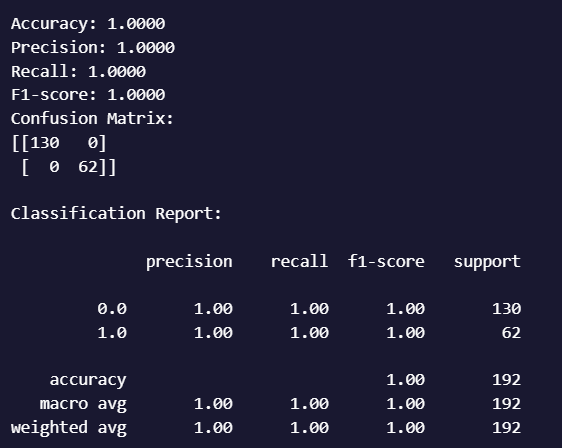

A perfect accuracy on this kind of complex data set is simply impossible, so I lower the number of epoch to avoid this (probably overfitting)



### 4.1.2 MLP-noZ

In [63]:
model_noZ.eval()
X_test = X2_test.float()
with torch.no_grad():
    outputs = model_noZ(X_test)
    y_pred2 = (outputs >= 0.5).float()

In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


# Accuracy
y_test=y2_test
y_pred2=y_pred2.squeeze()

accuracy = accuracy_score(y_test, y_pred2)

# Precision
precision = precision_score(y_test, y_pred2)

# Recall
recall = recall_score(y_test, y_pred2)

# F1-score
f1 = f1_score(y_test, y_pred2)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred2)


In [65]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred2))

Accuracy: 0.8471
Precision: 0.8750
Recall: 0.6774
F1-score: 0.7636
Confusion Matrix:
[[51  3]
 [10 21]]

Classification Report:

              precision    recall  f1-score   support

         0.0       0.84      0.94      0.89        54
         1.0       0.88      0.68      0.76        31

    accuracy                           0.85        85
   macro avg       0.86      0.81      0.83        85
weighted avg       0.85      0.85      0.84        85



Same thing for this data set with 1000 epoch the model is overfitting so i reduce to 100 to have more interpreatble result

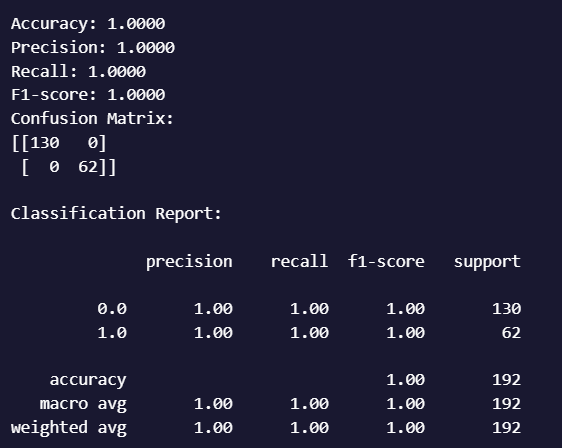

### 4.1.3 : MLP_com

In [66]:
model_noZ.eval()
X_test = X3_test.float()
with torch.no_grad():
    outputs = model_df(X_test)
    y_pred3 = (outputs >= 0.5).float()

In [67]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Accuracy
y_test=y3_test
accuracy = accuracy_score(y_test, y_pred3)

# Precision
precision = precision_score(y_test, y_pred3)

# Recall
recall = recall_score(y_test, y_pred3)

# F1-score
f1 = f1_score(y_test, y_pred3)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred3)


In [68]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)


print("\nClassification Report:\n")
print(classification_report(y_test, y_pred3))

Accuracy: 0.7953
Precision: 0.7083
Recall: 0.6182
F1-score: 0.6602
Confusion Matrix:
[[102  14]
 [ 21  34]]

Classification Report:

              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85       116
         1.0       0.71      0.62      0.66        55

    accuracy                           0.80       171
   macro avg       0.77      0.75      0.76       171
weighted avg       0.79      0.80      0.79       171



For this model its different with 1000 epoch we had worse result than for 100

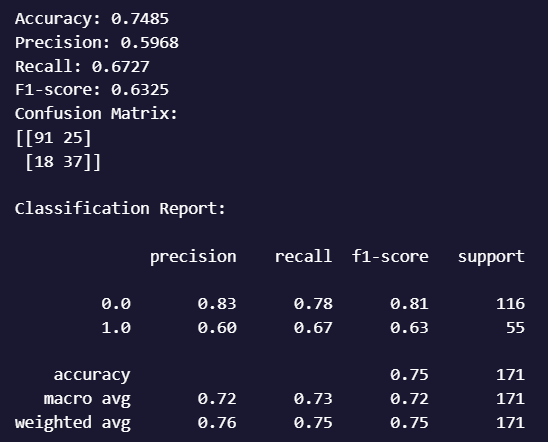

### 4.1.4 : Interpretation :

Let's compare the MLP models:

1 = `df`

2 = `df_noZ`

3 = `df_com`

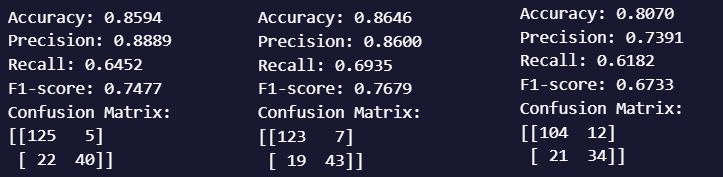

- Based on **accuracy**: The model trained on `df_noZ` has the best accuracy, which makes sense because the data is pure and not corrupted by zeros. Coming in second is the model trained on `df`, which is also logical since the training dataset contains the same biases as the evaluation data. Unsurprisingly, `df_com` performs the worst.

- Based on **precision**: The second model shows the highest precision, meaning it is better at identifying true positives compared to the other models. However, it struggles more with identifying true negatives, which is where the first model excels in comparison.

- Based on **recall & F1 score**: The second model is far ahead of the others in these metrics, making it more balanced overall.

In summary, both the first and second models are good at predicting data from the dataset— the first because it contains the same biases as the reference evaluation data, and the second because it was trained on pure, intact values. The third model, however, performs the worst in every category.


## 4.2. K-NN :

### 4.2.1. `K-NN_noZ`  :

In [69]:
knn_no_Z = KNeighborsClassifier(n_neighbors=5)
knn_no_Z.fit(X1_train, y1_train)

KNeighborsClassifier()

### 4.2.2. K-nn `df_com` :

In [70]:
knn_df = KNeighborsClassifier(n_neighbors=5)
knn_df.fit(X1_train, y1_train)

KNeighborsClassifier()

## 4.3. Random Forest :

### 4.3.1 Random Forest with `df` 

Making prediction with our random forest model 

In [71]:
pred_rand_df = random_df.predict(X6_test)
pred_rand_df

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

Let's have a look on result : 

In [ ]:
print("Random Forest - Accuracy:", accuracy_score(y6_test, pred_rand_df))
print("Random Forest - Classification Report:\n", classification_report(y6_test, pred_rand_df))

Random Forest - Accuracy: 0.78125
Random Forest - Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       130
           1       0.69      0.58      0.63        62

    accuracy                           0.78       192
   macro avg       0.75      0.73      0.74       192
weighted avg       0.77      0.78      0.78       192



This is not a bad starting point, and with some tuning, we should be able to improve further.

Now, let's take a look at the confusion matrix for the three models:


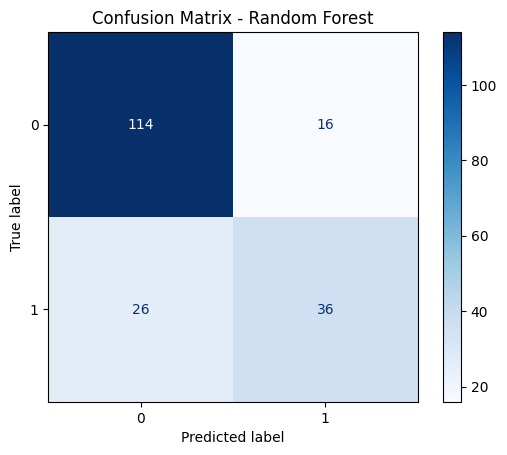

In [73]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_random_df = confusion_matrix(y6_test, pred_rand_df)


disp_rf = ConfusionMatrixDisplay(confusion_matrix=conf_random_df, display_labels=[0, 1])
disp_rf.plot(cmap='Blues')
plt.title('Confusion Matrix - Random Forest')

plt.show()

An interesting next step would be to print the weights of each variable in the final decision. This will help us determine whether keeping all the data was indeed the best choice.


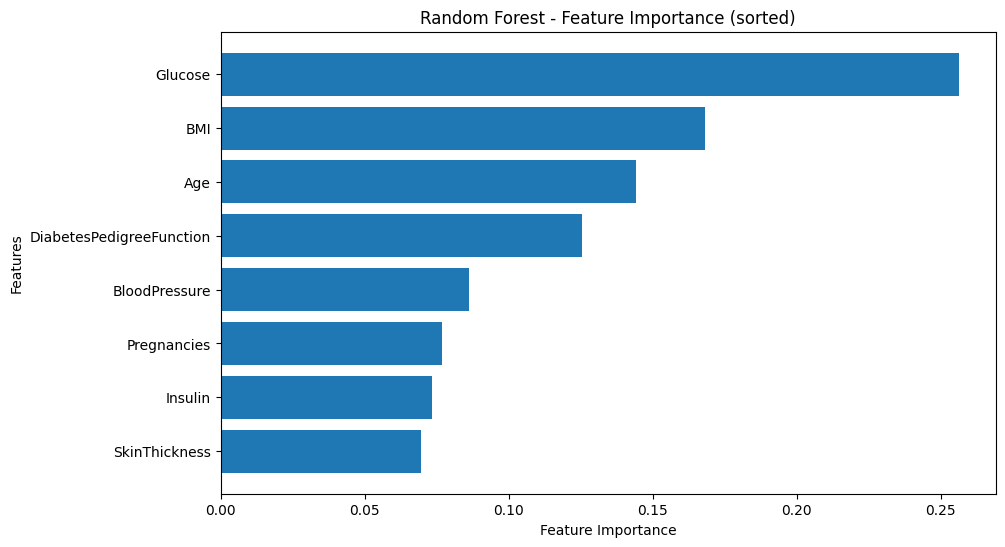

In [74]:

random_feature_importance = random_df.feature_importances_
features = X6_train.columns

sorted_idx_random = np.argsort(random_feature_importance)
sorted_features_random = pd.DataFrame({'Feature': features[sorted_idx_random], 'Importance': random_feature_importance[sorted_idx_random]})

plt.figure(figsize=(10, 6))
plt.barh(sorted_features_random['Feature'], sorted_features_random['Importance'], align='center')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest - Feature Importance (sorted)")

plt.show()

#### **Observations:**

- **Glucose**: is by far the most important feature this confirm the huge correlation we found with it before
 
- **BMI**: is the second most important feature the score is around 0.15
 
- **Age**: is also an important feature

I have to admit that i am surprise to see insulin at one of the least impact on the random tree. 
After some researchs one diabete it look very strange that insulin doesn't have more impact on this tree. We can explain this by the fact that insulin is composed of 0


# 5 MODEL TUNNING :

For optimize Hyper parameters we use Grid Search method who basicly use all combianson of parameters and only keep the one with the best result

## 5.1 Optimizing MLP Hyper Parameters

In [75]:
def train_and_evaluate(hidden_size, lr, optimizer_name, X_train, y_train, X_val, y_val, epochs):
    model = MLP(hidden_size)
    

    if optimizer_name == 'adam':
        optimizer = optim.Adam(model.parameters(), lr=lr)
    else :
        optimizer = optim.SGD(model.parameters(), lr=lr)

    criterion = nn.BCEWithLogitsLoss() 
    
    train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32))
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    
    for epoch in range(epochs):
        model.train()  
        for inputs, labels in train_loader:
            optimizer.zero_grad() 
            outputs = model(inputs).squeeze(1) 
            loss = criterion(outputs, labels)  
            loss.backward()  
            optimizer.step()
        
  
    model.eval()  
    with torch.no_grad():
        val_outputs = model(torch.tensor(X_val, dtype=torch.float32)).squeeze(1)
        val_preds = torch.round(torch.sigmoid(val_outputs))  
        accuracy = accuracy_score(y_val, val_preds.numpy())  
    
    return accuracy


In [76]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


In [77]:
from sklearn.metrics import accuracy_score

param_grid = {
    'hidden_size': [16, 32, 64],
    'learning_rate': [0.01, 0.001],
    'optimizer': ['adam', 'SDG'],
    'epoch': [10, 50, 100, 200, 300, 400, 500, 600, 750, 1000]
}

best_accuracy = 0
best_params = {}
l = []

for hidden_size in param_grid['hidden_size']:
    for lr in param_grid['learning_rate']:
        for optimizer_name in param_grid['optimizer']:
            for ep in param_grid['epoch']:
                accuracy = train_and_evaluate(hidden_size, lr, optimizer_name, X1_train, y1_train, X1_test, y1_test, epoch)
                l.append(f"Accuracy: {accuracy:.4f} | hidden_size: {hidden_size}, lr: {lr}, optimizer: {optimizer_name}")
                
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_params = {
                        'hidden_size': hidden_size,
                        'learning_rate': lr,
                        'optimizer': optimizer_name,
                        'epoch': ep
                    }

print(f"Best accuracy: {best_accuracy:.4f} with parameters: {best_params}")


Best accuracy: 0.8125 with parameters: {'hidden_size': 16, 'learning_rate': 0.001, 'optimizer': 'adam', 'epoch': 750}


Best accuracy : 0.8125 with parameters: {'hidden_size': 16, 'learning_rate': 0.001, 'optimizer': 'adam', 'epoch': 1000}

In [78]:
from sklearn.metrics import accuracy_score

param_grid = {
    'hidden_size': [16, 32, 64],
    'learning_rate': [0.01, 0.001],
    'optimizer': ['adam', 'SGD'],
    'epoch': [10, 50, 100, 200, 300, 400, 500, 600, 750, 1000]
}

best_accuracy = 0
best_params = {}
results = []

for hidden_size in param_grid['hidden_size']:
    for lr in param_grid['learning_rate']:
        for optimizer_name in param_grid['optimizer']:
            for ep in param_grid['epoch']:
                accuracy = train_and_evaluate(hidden_size, lr, optimizer_name, X2_train, y2_train, X2_test, y2_test, ep)
                
                results.append(f"Accuracy: {accuracy:.4f} | hidden_size: {hidden_size}, lr: {lr}, optimizer: {optimizer_name}, epoch: {ep}")
                
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_params = {
                        'hidden_size': hidden_size,
                        'learning_rate': lr,
                        'optimizer': optimizer_name,
                        'epoch': ep
                    }

print(f"Best accuracy: {best_accuracy:.4f} with parameters: {best_params}")

Best accuracy: 0.8000 with parameters: {'hidden_size': 16, 'learning_rate': 0.01, 'optimizer': 'adam', 'epoch': 10}


Best accuracy: 0.8000 with parameters: {'hidden_size': 32, 'learning_rate': 0.001, 'optimizer': 'adam', 'epoch': 100}

In [79]:
from sklearn.metrics import accuracy_score

param_grid = {
    'hidden_size': [16, 32, 64],
    'learning_rate': [0.01, 0.001],
    'optimizer': ['adam', 'SDG'],
    'epoch': [10, 50, 100, 200, 300, 400, 500, 600, 750, 1000]
}

best_accuracy = 0
best_params = {}
l = []

for hidden_size in param_grid['hidden_size']:
    for lr in param_grid['learning_rate']:
        for optimizer_name in param_grid['optimizer']:
            for ep in param_grid['epoch']:
                accuracy = train_and_evaluate(hidden_size, lr, optimizer_name, X3_train, y3_train, X3_test, y3_test, epoch)
                l.append(f"Accuracy: {accuracy:.4f} | hidden_size: {hidden_size}, lr: {lr}, optimizer: {optimizer_name}")
                
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_params = {
                        'hidden_size': hidden_size,
                        'learning_rate': lr,
                        'optimizer': optimizer_name,
                        'epoch': ep
                    }

print(f"Best accuracy: {best_accuracy:.4f} with parameters: {best_params}")


Best accuracy: 0.8070 with parameters: {'hidden_size': 32, 'learning_rate': 0.01, 'optimizer': 'SDG', 'epoch': 50}


Best accuracy: 0.8012 with parameters: {'hidden_size': 16, 'learning_rate': 0.001, 'optimizer': 'adam', 'epoch': 200}

## 5.2 Optimizing K-NN Hyper Parameters

the only real hypper parameter is the k in k-nn

### 5.2.1 k-nn on `noZ`

In [80]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

#set up the k range
k_range = range(1, 21)
scores = []

# Vcross validation for each k
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn, X4, y4, cv=10)  # Validation croisée avec 10 folds
    scores.append(cv_scores.mean())

# Trouver le meilleur k
best_k = k_range[np.argmax(scores)]
print(f"The best k is {best_k}")

# Entraîner le modèle avec le meilleur k
best_knn = KNeighborsClassifier(n_neighbors=best_k)

# Calcul de l'accuracy en utilisant une validation croisée
accuracy_scores = cross_val_score(best_knn, X4, y4, cv=10, scoring='accuracy')

# Afficher l'accuracy moyenne
mean_accuracy = np.mean(accuracy_scores)
print(f"Mean accuracy for the best k ({best_k}) is: {mean_accuracy:.4f}")


The best k is 8
Mean accuracy for the best k (8) is: 0.7842


### 5.2.2 k-nn on `df_com`

In [81]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

k_range = range(1, 21)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn, X5, y5, cv=10)
    scores.append(cv_scores.mean())

best_k = k_range[np.argmax(scores)]
print(f"The best k is {best_k}")

best_knn = KNeighborsClassifier(n_neighbors=best_k)

accuracy_scores = cross_val_score(best_knn, X5, y5, cv=10, scoring='accuracy')

mean_accuracy = np.mean(accuracy_scores)
print(f"Mean accuracy for the best k ({best_k}) is: {mean_accuracy:.4f}")


The best k is 19
Mean accuracy for the best k (19) is: 0.7852


## 5.3 Optimizing Random Forest Parameters

Let's recreate a new model but this time we will play with and optimize the parameters. First, we will set them up manually.

### Parameters Explanation:

- **Max Features**: The maximum number of different variables (features) that each tree can consider when making a decision at each split.
  
- **n_estimators**: The number of trees (or estimators) in the forest. A higher number of trees can improve accuracy, but it increases computation time. 

- **Max Depth**: Defines the maximum depth of each decision tree. Reducing this value can help to avoid overfitting by limiting how much detail the trees can learn from the data. Increasing it allows the trees to analyze more complex and detailed patterns. 

- **min_samples_split**: The minimum number of samples required to split an internal node in the tree. Increasing this value can help regularize the model by forcing nodes to contain more data before they are split, which can prevent overfitting on small data subsets.

- **min_samples_leaf**: The minimum number of samples required to be in a leaf node. Larger values prevent trees from learning highly specific patterns from small subsets of data, helping to generalize better to unseen data.



We will use a grid search to explore and select the best combination of these hyperparameters for our dataset.


Random Forest (with hyperparameters) - Accuracy: 0.7916666666666666
Random Forest (with hyperparameters) - Classification Report:

               precision    recall  f1-score   support

           0       0.81      0.91      0.86       130
           1       0.74      0.55      0.63        62

    accuracy                           0.79       192
   macro avg       0.77      0.73      0.74       192
weighted avg       0.79      0.79      0.78       192



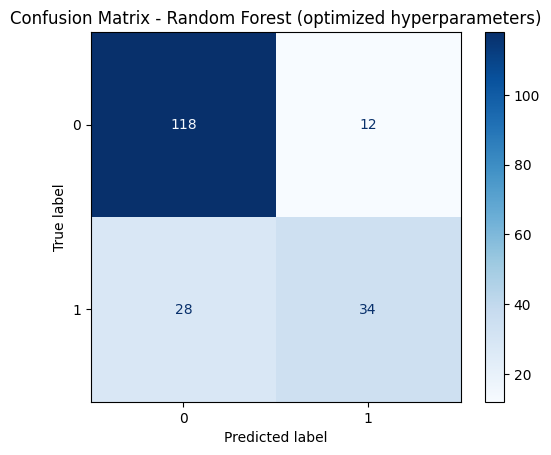

In [82]:
random_forest_final = RandomForestClassifier(
    n_estimators=100,
    max_features=4,
    max_depth=5,
    min_samples_split=3,
    min_samples_leaf=1
        )

random_forest_final.fit(X6_train, y6_train)

# Predictions
y_pred_random_forest = random_forest_final.predict(X6_test)
print("Random Forest (with hyperparameters) - Accuracy:", accuracy_score(y6_test, y_pred_random_forest))
print("Random Forest (with hyperparameters) - Classification Report:\n\n", classification_report(y6_test, y_pred_random_forest))

# Plot the confusion matrix
cm_random_forest = confusion_matrix(y6_test, y_pred_random_forest)
disp_random_forest = ConfusionMatrixDisplay(confusion_matrix=cm_random_forest, display_labels=[0, 1])
disp_random_forest.plot(cmap='Blues')
plt.title('Confusion Matrix - Random Forest (optimized hyperparameters)')

plt.show()

optimisation of hyperparameters :


Lets recreate a last las model with optimized paramters with the help of gridsearch

Fitting 5 folds for each of 32 candidates, totalling 160 fits
The Best Hyperparameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000}
Optimized Random Forest Accuracy: 0.78125
Classification Report:

               precision    recall  f1-score   support

           0       0.81      0.88      0.84       130
           1       0.69      0.58      0.63        62

    accuracy                           0.78       192
   macro avg       0.75      0.73      0.74       192
weighted avg       0.77      0.78      0.78       192



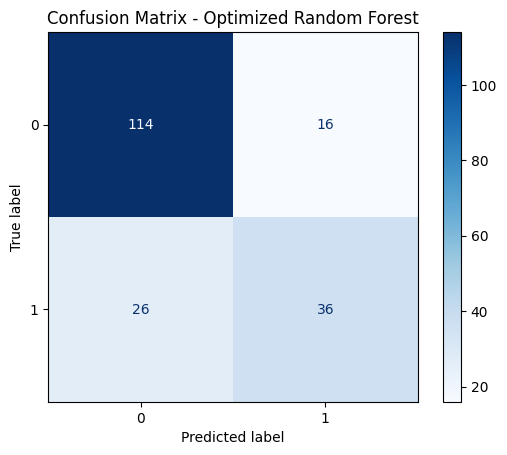

In [83]:
# Hyperparameter Tuning with GridSearch
from sklearn.model_selection import GridSearchCV
# Define the hyperparameters to search
param_grid = {
    'n_estimators': [10, 1000],  # Number of trees in the forest
    'max_depth': [10, 50],  # Maximum depth of the tree
    'min_samples_split': [2, 10],  # Minimum number of the samples required to split on the node
    'min_samples_leaf': [1, 3],  # Minimum number of the samples required to be at a leaf node
    'max_features': ['sqrt', 'log2']  # Which features to consider at each split
}

last_model = RandomForestClassifier(random_state=42)
grid_search_random = GridSearchCV(estimator=last_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')  # n_jobs=-1 to use all processors

grid_search_random.fit(X6_train, y6_train)

print(f"The Best Hyperparameters: {grid_search_random.best_params_}")

# Evaluate the optimized model
best_random = grid_search_random.best_estimator_
y_pred_rf_best = best_random.predict(X6_test)

print(f"Optimized Random Forest Accuracy: {accuracy_score(y6_test, y_pred_rf_best)}")
print("Classification Report:\n\n", classification_report(y6_test, y_pred_rf_best))

# Plot the confusion matrix
cm_rf_best = confusion_matrix(y6_test, y_pred_rf_best)
disp_rf_best = ConfusionMatrixDisplay(confusion_matrix=cm_rf_best, display_labels=[0, 1])
disp_rf_best.plot(cmap='Blues')
plt.title('Confusion Matrix - Optimized Random Forest')

plt.show()

dfnoz

Fitting 5 folds for each of 32 candidates, totalling 160 fits
The Best Hyperparameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 10}
Optimized Random Forest Accuracy: 0.8117647058823529
Classification Report:

               precision    recall  f1-score   support

           0       0.80      0.94      0.86        54
           1       0.86      0.58      0.69        31

    accuracy                           0.81        85
   macro avg       0.83      0.76      0.78        85
weighted avg       0.82      0.81      0.80        85



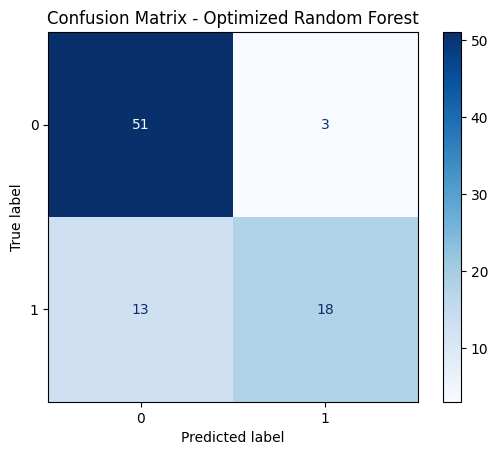

In [84]:
# Hyperparameter Tuning with GridSearch
from sklearn.model_selection import GridSearchCV
# Define the hyperparameters to search
param_grid = {
    'n_estimators': [10, 1000],  # Number of trees in the forest
    'max_depth': [10, 50],  # Maximum depth of the tree
    'min_samples_split': [2, 10],  # Minimum number of the samples required to split on the node
    'min_samples_leaf': [1, 3],  # Minimum number of the samples required to be at a leaf node
    'max_features': ['sqrt', 'log2']  # Which features to consider at each split
}

last_model = RandomForestClassifier(random_state=42)
grid_search_random = GridSearchCV(estimator=last_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')  # n_jobs=-1 to use all processors

grid_search_random.fit(X7_train, y7_train)

print(f"The Best Hyperparameters: {grid_search_random.best_params_}")

# Evaluate the optimized model
best_random = grid_search_random.best_estimator_
y_pred_rf_best = best_random.predict(X7_test)

print(f"Optimized Random Forest Accuracy: {accuracy_score(y7_test, y_pred_rf_best)}")
print("Classification Report:\n\n", classification_report(y7_test, y_pred_rf_best))

# Plot the confusion matrix
cm_rf_best = confusion_matrix(y7_test, y_pred_rf_best)
disp_rf_best = ConfusionMatrixDisplay(confusion_matrix=cm_rf_best, display_labels=[0, 1])
disp_rf_best.plot(cmap='Blues')
plt.title('Confusion Matrix - Optimized Random Forest')

plt.show()

Fitting 5 folds for each of 32 candidates, totalling 160 fits


The Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 10}
Optimized Random Forest Accuracy: 0.7777777777777778
Classification Report:

               precision    recall  f1-score   support

           0       0.82      0.86      0.84       116
           1       0.67      0.60      0.63        55

    accuracy                           0.78       171
   macro avg       0.75      0.73      0.74       171
weighted avg       0.77      0.78      0.77       171



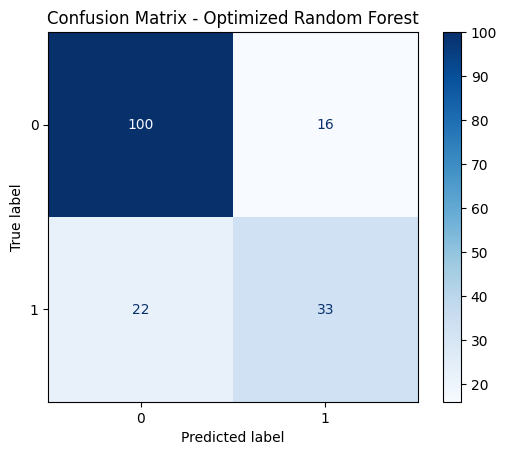

In [85]:
# Hyperparameter Tuning with GridSearch
from sklearn.model_selection import GridSearchCV
# Define the hyperparameters to search
param_grid = {
    'n_estimators': [10, 1000],  # Number of trees in the forest
    'max_depth': [10, 50],  # Maximum depth of the tree
    'min_samples_split': [2, 10],  # Minimum number of the samples required to split on the node
    'min_samples_leaf': [1, 3],  # Minimum number of the samples required to be at a leaf node
    'max_features': ['sqrt', 'log2']  # Which features to consider at each split
}

last_model = RandomForestClassifier(random_state=42)
grid_search_random = GridSearchCV(estimator=last_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')  # n_jobs=-1 to use all processors

grid_search_random.fit(X8_train, y8_train)

print(f"The Best Hyperparameters: {grid_search_random.best_params_}")

# Evaluate the optimized model
best_random = grid_search_random.best_estimator_
y_pred_rf_best = best_random.predict(X8_test)

print(f"Optimized Random Forest Accuracy: {accuracy_score(y8_test, y_pred_rf_best)}")
print("Classification Report:\n\n", classification_report(y8_test, y_pred_rf_best))

# Plot the confusion matrix
cm_rf_best = confusion_matrix(y8_test, y_pred_rf_best)
disp_rf_best = ConfusionMatrixDisplay(confusion_matrix=cm_rf_best, display_labels=[0, 1])
disp_rf_best.plot(cmap='Blues')
plt.title('Confusion Matrix - Optimized Random Forest')

plt.show()

This is very bad. 
based on my reasearch Preprocessing data is not mandatory for a random forest tree, but the performance are really bad so we will try to with normalization. I am saying so because based on initial data a decision tree or random forest tree is by far the optimal model to fit 

# 6 FINAL RESULT :


## 6.1 based on accuracy :
the accuracy is :
- MLP :
  - for MLP with `df` : 81.25%
  - for MLP with `noZ` : 80.00%
  - for MLP with `df_completed`: 80.12%
- k-nn :
  - for knn with `noZ`: 78.42%
  - for knn with `df_completed`: 78.52%
- Random forest :
  - for random forest with `df` : 78.13%
  - for random forest with `noZ`: 81.17%
  - for random forest with `df_completed` : 77.77%

## 6.2 Expectations and Why?

We expected the best results to come from Random Forest, given that this type of model is specialized for datasets with missing data, and our dataset has a lot of missing or corrupted values. Random Forest tests combinations of variables and rows, which proves to be very useful in this case, as it would be able to learn that the zeros indicated a lack of data rather than a real value through extensive training.

In any case, we anticipated good performance from `df_noZ` since it contained only intact data, especially for the MLP, which excels with unbiased data. However, it is possible that the small amount of data contributed to weakening the model.

A potential winning combination could have been using `df` with Random Forest or `df_noZ` with MLP.

As I suspected, the performance of `df_completed` is not the best, as ultimately this dataset merely replaces one bias with another that is a bit more subtle and integrated into the data.


## 6.3 Final Conclusion:

In the field of machine learning, data processing is as important as model construction. In our case, we have pushed both aspects to achieve a very satisfactory result. It seems that across all models, there is a tendency to produce many false negatives, while false positives are much rarer.

Our accuracies are around 0.80, which is quite satisfying. However, there is a bitter aftertaste of potential left untapped; I do not understand why the decision tree model turns out to be less effective than the MLP.

The MLP has proven to be the most performant model, and the fact that we configured it from A to Z manually via PyTorch may have contributed to its success.
